In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
from keras import layers
from keras import models
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images.shape

170500096/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

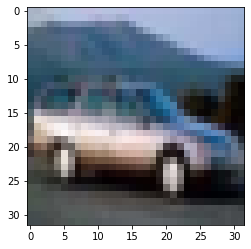

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)

plt.show()

In [4]:
# MODIFY THE CODE TO ADD A VALIDATION SET
from keras.preprocessing.image import ImageDataGenerator
train_images = train_images
train_labels = train_labels

train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

val_images = train_images[:10000]
val_labels = train_labels[:10000]

train_images = train_images[10000:]
train_labels = train_labels[10000:]

train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
# train_datagen.fit(train_images)

val_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
val_datagen.fit(val_images)

train_images.shape, val_images.shape, train_labels.shape, val_labels.shape


((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 10), (10000, 10))

In [5]:
  # MAKE WHATEVER CHANGES ARE NECESSARY
  # TO GET 0.7 ACCURACY ON THE TEST SET
  
model = models.Sequential()
model.add(layers.Conv2D(32, (3 ,3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
#model.add(layers.Dense(1024, activation='relu'))
#model.add(layers.Dropout(0.25))

model.add(layers.Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.25))

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=0.35)

In [8]:
  # MAKE WHATEVER CHANGES ARE NECESSARY
  # TO GET 0.7 ACCURACY ON THE TEST SET
epochs = 170
model_hist = model.fit(
    train_datagen.flow(train_images, train_labels, batch_size=32), 
    steps_per_epoch=len(train_images) / 32, 
    epochs=epochs, 
    validation_data=(val_images, val_labels))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/170
1250/1250 [==============================] - 35s 21ms/step - loss: 2.3946 - accuracy: 0.1637 - val_loss: 1.8182 - val_accuracy: 0.2859
Epoch 2/170
1250/1250 [==============================] - 26s 21ms/step - loss: 1.8238 - accuracy: 0.2962 - val_loss: 1.6381 - val_accuracy: 0.3787
Epoch 3/170
1250/1250 [==============================] - 26s 21ms/step - loss: 1.6799 - accuracy: 0.3773 - val_loss: 1.7604 - val_accuracy: 0.3895
Epoch 4/170
1250/1250 [==============================] - 26s 21ms/step - loss: 1.5369 - accuracy: 0.4467 - val_loss: 1.2863 - val_accuracy: 0.5242
Epoch 5/170
1250/1250 [==============================] - 26s 21ms/step - loss: 1.4295 - accuracy: 0.4968 - val_loss: 1.1492 - val_accuracy: 0.5923
Epoch 6/170
1250/1250 [==============================] - 26s 21ms/step - loss: 1.3481 - accuracy: 0.5314 - val_loss: 1.4076 - val_accuracy: 0.5257
Epoch 7/170
1250/1250 [==============================] - 26s 21ms/step - loss: 1.2599 - accuracy: 0.5653 - val_loss: 1

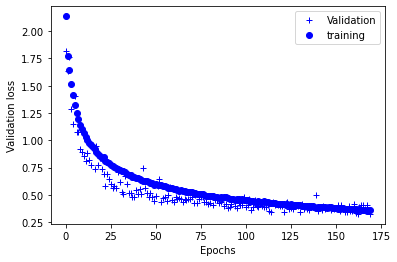

In [9]:
import matplotlib.pyplot as plt

epochs = range(0, epochs)
train_loss = model_hist.history['loss']
val_loss= model_hist.history['val_loss']

plt.plot(epochs, val_loss, 'b+', label='Validation')
plt.plot(epochs, train_loss, 'bo', label='training')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
test_loss

313/313 [==============================] - 1s 4ms/step - loss: 0.3583 - accuracy: 0.8868
test_acc: 0.8867999911308289


0.35827818512916565

In [11]:
model.save_weights('./cifar10.h5', overwrite=True)